In [1]:
# Initial imports
import os
import pandas as pd
import numpy as np
import seaborn as sns
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt

# from MCForecastTools import MCSimulation
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [4]:
# Tickers
ticker = ["BABA", "DIS", "TSLA", "SPY"]

# set timeframe to '1D'

timeframe = "1D"


# Set start and end datetimes of 5 years
start_date = pd.Timestamp("2016-05-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-24", tz="America/New_York").isoformat()


# Get 5 year's worth of historical data 
all_stocks_df = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# # Display sample data
all_stocks_df.head(10)

BABA                                        DIS  \
                             open     high     low   close    volume    open   
time                                                                           
2017-06-05 00:00:00-04:00  124.00  125.560  123.87  125.37   8021032  104.63   
2017-06-06 00:00:00-04:00  125.60  126.200  124.27  124.63   7974948  106.17   
2017-06-07 00:00:00-04:00  125.08  125.910  124.11  125.67   7319114  105.79   
2017-06-08 00:00:00-04:00  142.51  143.700  135.21  142.38  62224198  103.19   
2017-06-09 00:00:00-04:00  144.57  148.290  137.01  139.36  46078639  104.29   
2017-06-12 00:00:00-04:00  139.28  142.200  136.05  139.10  27531987  105.89   
2017-06-13 00:00:00-04:00  141.81  142.244  135.90  136.45  33762441  107.14   
2017-06-14 00:00:00-04:00  137.80  139.250  135.26  136.68  25584146  104.53   
2017-06-15 00:00:00-04:00  135.64  135.670  133.10  135.01  25781627  103.47   
2017-06-16 00:00:00-04:00  136.28  136.500  133.55  134.90  29647562  106.28   

                                                                 SPY          \
                              high      low   close   volume    open    high   
time                                                                           
2017-06-05 00:00:00-04:00  106.875  103.720  106.51  5302320  243.98  244.30   
2017-06-06 00:00:00-04:00  106.190  104.610  105.51  8287158  243.31  243.98   
2017-06-07 00:00:00-04:00  106.250  103.430  103.52  4621500  243.60  243.92   
2017-06-08 00:00:00-04:00  104.490  101.800  104.32  8839933  243.77  244.33   
2017-06-09 00:00:00-04:00  105.920  104.080  105.62  7628117  244.09  245.01   
2017-06-12 00:00:00-04:00  107.080  103.690  107.05  6753315  243.14  243.42   
2017-06-13 00:00:00-04:00  107.260  104.000  104.15  3788305  243.99  244.61   
2017-06-14 00:00:00-04:00  104.590  103.370  103.74  3483352  244.86  244.87   
2017-06-15 00:00:00-04:00  106.070  102.880  105.95  3685768  242.68  243.91   
2017-06-16 00:00:00-04:00  106.350  104.765  105.53  5951970  242.77  242.83   

                                                            TSLA            \
                                low    close     volume     open      high   
time                                                                         
2017-06-05 00:00:00-04:00  243.7600  243.965   27596403  338.500  348.4400   
2017-06-06 00:00:00-04:00  243.1200  243.250   36562468  344.950  359.4929   
2017-06-07 00:00:00-04:00  242.8300  243.650   38602639  356.300  360.5000   
2017-06-08 00:00:00-04:00  243.1700  243.760   48051333  363.750  371.9000   
2017-06-09 00:00:00-04:00  241.9500  243.450  103578275  374.420  376.8700   
2017-06-12 00:00:00-04:00  242.3800  243.340   57096569  357.990  364.5000   
2017-06-13 00:00:00-04:00  243.5799  244.520   43470532  367.670  376.0000   
2017-06-14 00:00:00-04:00  243.2900  244.260   55098826  381.085  384.2500   
2017-06-15 00:00:00-04:00  242.3600  243.790   51523068  372.500  375.4600   
2017-06-16 00:00:00-04:00  241.6337  242.630   48998243  377.780  378.0100   

                                                       
                              low     close    volume  
time                                                   
2017-06-05 00:00:00-04:00  334.21  347.3200   5684288  
2017-06-06 00:00:00-04:00  344.66  352.8000   9465968  
2017-06-07 00:00:00-04:00  355.14  359.5500   7850542  
2017-06-08 00:00:00-04:00  360.22  370.0100   7489685  
2017-06-09 00:00:00-04:00  354.80  357.4500  14323526  
2017-06-12 00:00:00-04:00  350.62  358.9900   8528936  
2017-06-13 00:00:00-04:00  366.61  375.9500   9720070  
2017-06-14 00:00:00-04:00  376.31  380.6599  10303555  
2017-06-15 00:00:00-04:00  366.49  375.3400   8585072  
2017-06-16 00:00:00-04:00  370.10  371.4000   4691654

In [5]:
all_stocks_df.isnull().sum()

BABA  open      0
      high      0
      low       0
      close     0
      volume    0
DIS   open      0
      high      0
      low       0
      close     0
      volume    0
SPY   open      0
      high      0
      low       0
      close     0
      volume    0
TSLA  open      0
      high      0
      low       0
      close     0
      volume    0
dtype: int64

In [6]:
df = all_stocks_df.dropna()

df.isnull().sum()

BABA  open      0
      high      0
      low       0
      close     0
      volume    0
DIS   open      0
      high      0
      low       0
      close     0
      volume    0
SPY   open      0
      high      0
      low       0
      close     0
      volume    0
TSLA  open      0
      high      0
      low       0
      close     0
      volume    0
dtype: int64

In [7]:
df.tail()

BABA                                       DIS  \
                              open    high     low   close    volume    open   
time                                                                           
2021-05-18 00:00:00-04:00  212.540  215.17  211.42  213.73  18741751  170.26   
2021-05-19 00:00:00-04:00  211.000  212.91  210.12  212.54  15573925  167.80   
2021-05-20 00:00:00-04:00  212.995  217.63  212.63  216.91  17416865  169.00   
2021-05-21 00:00:00-04:00  215.230  215.89  209.87  211.09  20633912  172.50   
2021-05-24 00:00:00-04:00  210.100  212.01  208.70  210.28  12012615  172.54   

                                                                  SPY  \
                               high      low   close   volume    open   
time                                                                    
2021-05-18 00:00:00-04:00  171.2600  169.450  169.67  9504650  415.80   
2021-05-19 00:00:00-04:00  169.3500  167.095  169.30  8209406  406.92   
2021-05-20 00:00:00-04:00  171.9000  168.975  171.36  6515309  411.80   
2021-05-21 00:00:00-04:00  173.1185  171.520  172.46  7138200  416.87   
2021-05-24 00:00:00-04:00  175.1100  171.750  174.32  6406229  417.34   

                                                                 TSLA          \
                              high      low   close    volume    open    high   
time                                                                            
2021-05-18 00:00:00-04:00  416.060  411.770  411.99  52318865  568.39  596.25   
2021-05-19 00:00:00-04:00  411.050  405.335  410.90  94165741  552.37  566.21   
2021-05-20 00:00:00-04:00  416.625  411.670  415.24  69426295  574.99  588.85   
2021-05-21 00:00:00-04:00  418.200  414.450  414.95  66392970  595.78  596.68   
2021-05-24 00:00:00-04:00  420.320  417.080  419.12  45514589  581.45  614.48   

                                                       
                              low     close    volume  
time                                                   
2021-05-18 00:00:00-04:00  563.38  577.6900  35444404  
2021-05-19 00:00:00-04:00  546.98  563.4596  36854713  
2021-05-20 00:00:00-04:00  571.07  586.7000  28905392  
2021-05-21 00:00:00-04:00  580.00  580.8900  24381519  
2021-05-24 00:00:00-04:00  573.65  606.8700  32962329

In [8]:
# Create and empty DataFrame for closing prices
all_closing_prices = pd.DataFrame()

# Fetch the closing prices 
all_closing_prices["BABA"] = all_stocks_df["BABA"]["close"]
all_closing_prices["SPY"] = all_stocks_df["SPY"]["close"]
all_closing_prices["DIS"] = all_stocks_df["DIS"]["close"]
all_closing_prices["TSLA"] = all_stocks_df["TSLA"]["close"]

# Drop the time component of the date
all_closing_prices.index = all_closing_prices.index.date

# Compute daily returns
all_returns = all_closing_prices.pct_change().dropna()

# Display
all_returns.tail()

,BABA,SPY,DIS,TSLA
2021-05-18,0.011644,-0.008567,-0.002411,0.001491
2021-05-19,-0.005568,-0.002646,-0.002181,-0.024633
2021-05-20,0.020561,0.010562,0.012168,0.041246
2021-05-21,-0.026831,-0.000698,0.006419,-0.009903
2021-05-24,-0.003837,0.010049,0.010785,0.044724


<AxesSubplot:title={'center':'Cumulative Returns'}>

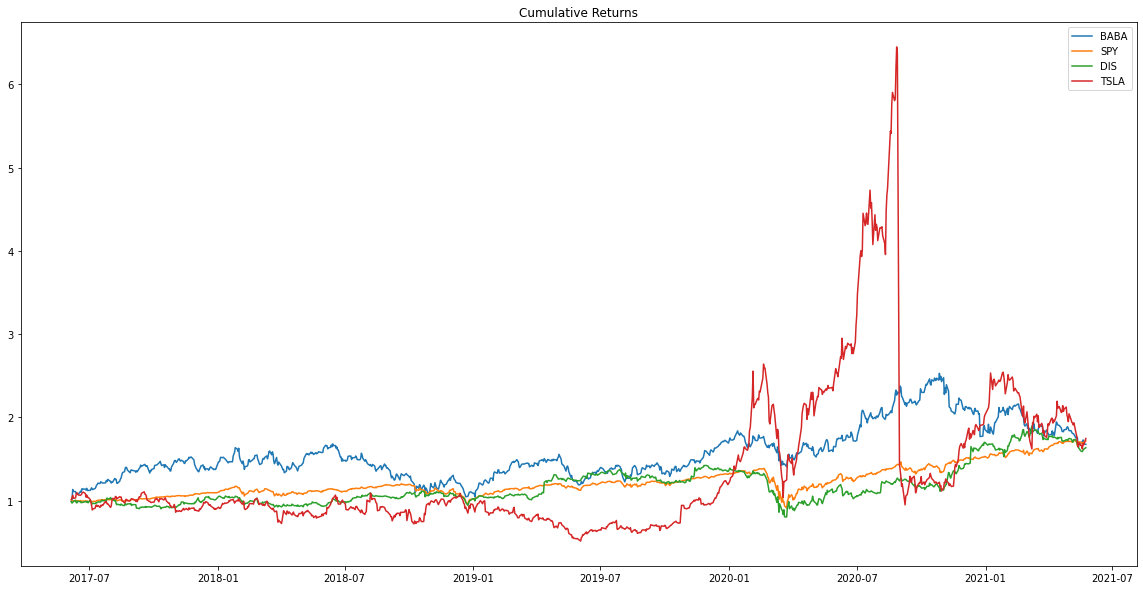

In [9]:
# Calculate Cumulative Returns
all_cumulative_returns = (1 + all_returns).cumprod()

# Plot Cummulative Returns
all_cumulative_returns.plot(title = 'Cumulative Returns', figsize = (20,10) )

<AxesSubplot:ylabel='Density'>

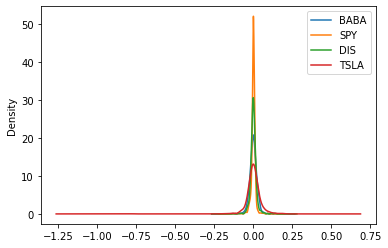

In [10]:
all_returns.plot.density()

In [11]:
# Calculate Standard Deviation
all_std = all_returns.std()

# Calculate Annual Standard Deviation
all_annual_std = all_std * np.sqrt(252)

# Display Standard Deviation
all_annual_std

BABA    0.357224
SPY     0.208536
DIS     0.313140
TSLA    0.748926
dtype: float64

In [12]:
# Calculate Correlation
all_correlation = all_returns.corr()

<AxesSubplot:>

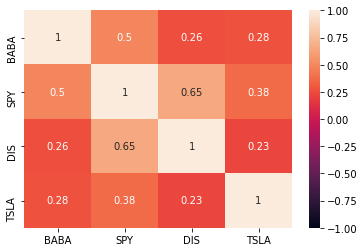

In [13]:
# Plot Correlation 
sns.heatmap(all_correlation, vmin = -1, vmax = 1, annot = True)

In [14]:
# Calculate Covariance
baba_spy_covar = all_returns['BABA'].rolling(window = 60).cov(all_returns['SPY'])
dis_spy_covar = all_returns['DIS'].rolling(window = 60).cov(all_returns['SPY'])
tsla_spy_covar = all_returns['TSLA'].rolling(window = 60).cov(all_returns['SPY'])
#ethe_spy_covar = all_returns['ETHE'].rolling(window = 60).cov(all_returns['SPY'])

In [15]:
# Calculate Variance
baba_spy_var = all_returns['SPY'].rolling(window = 60).var()
dis_spy_var = all_returns['SPY'].rolling(window = 60).var()
tsla_spy_var = all_returns['SPY'].rolling(window = 60).var()
#ethe_spy_var = all_returns['SPY'].rolling(window = 60).var()

In [16]:
# Calculate Beta
#### ADD ETH DATA !!!!
baba_beta = baba_spy_covar / baba_spy_var
dis_beta = dis_spy_covar / dis_spy_var
tsla_beta = tsla_spy_covar / tsla_spy_var
#ethe_beta = ethe_spy_covar / ethe_spy_var
combined_beta = baba_beta + dis_beta + tsla_beta 

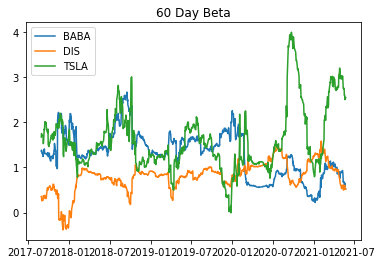

<Figure size 1440x1440 with 0 Axes>

In [17]:
# Plot Beta
#### ADD ETH DATA!!!

baba_beta_plot = plt.plot(baba_beta, label = "BABA")
dis_beta_plot = plt.plot(dis_beta, label = "DIS" )
tsla_beta_plot = plt.plot(tsla_beta, label = "TSLA")
#eth_beta_plot = plt.plot(eth_beta, label = "ETH")
plt.title("60 Day Beta")
plt.legend()
fig_size = plt.figure()
fig_size.set_figwidth(20)
fig_size.set_figheight(20)

# Display
plt.show()

In [18]:
# Calculate the Sharpe Ratio
all_sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
# Display Sharpe Ratio
all_sharpe_ratios

BABA    0.543811
SPY     0.759669
DIS     0.551906
TSLA    0.700917
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

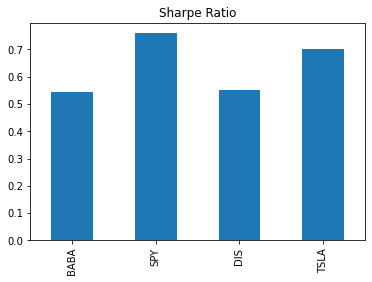

In [19]:
# Plot Sharpe Ratio
all_sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratio")


In [20]:
ticker2 = ["BABA"]

# set timeframe to '1D'

timeframe = "1D"


# Set start and end datetimes of 5 years
start_date = pd.Timestamp("2016-05-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-24", tz="America/New_York").isoformat()


# Get 5 year's worth of historical data
baba_df = alpaca.get_barset(  
    ticker2,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# # Display sample data
baba_df.head(10)

BABA                                   
                             open     high     low   close    volume
time                                                                
2017-06-05 00:00:00-04:00  124.00  125.560  123.87  125.37   8021032
2017-06-06 00:00:00-04:00  125.60  126.200  124.27  124.63   7974948
2017-06-07 00:00:00-04:00  125.08  125.910  124.11  125.67   7319114
2017-06-08 00:00:00-04:00  142.51  143.700  135.21  142.38  62224198
2017-06-09 00:00:00-04:00  144.57  148.290  137.01  139.36  46078639
2017-06-12 00:00:00-04:00  139.28  142.200  136.05  139.10  27531987
2017-06-13 00:00:00-04:00  141.81  142.244  135.90  136.45  33762441
2017-06-14 00:00:00-04:00  137.80  139.250  135.26  136.68  25584146
2017-06-15 00:00:00-04:00  135.64  135.670  133.10  135.01  25781627
2017-06-16 00:00:00-04:00  136.28  136.500  133.55  134.90  29647562

In [21]:
# BABA: Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
baba_MC_fiveyear = MCSimulation(
    portfolio_data = baba_df,
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Print the simulation input data
baba_MC_fiveyear.portfolio_data.head()

BABA                                    \
                             open    high     low   close    volume   
time                                                                  
2017-06-05 00:00:00-04:00  124.00  125.56  123.87  125.37   8021032   
2017-06-06 00:00:00-04:00  125.60  126.20  124.27  124.63   7974948   
2017-06-07 00:00:00-04:00  125.08  125.91  124.11  125.67   7319114   
2017-06-08 00:00:00-04:00  142.51  143.70  135.21  142.38  62224198   
2017-06-09 00:00:00-04:00  144.57  148.29  137.01  139.36  46078639   

                                        
                          daily_return  
time                                    
2017-06-05 00:00:00-04:00          NaN  
2017-06-06 00:00:00-04:00    -0.005903  
2017-06-07 00:00:00-04:00     0.008345  
2017-06-08 00:00:00-04:00     0.132967  
2017-06-09 00:00:00-04:00    -0.021211

In [22]:
# BABA: Running a Monte Carlo simulation to forecast 5 years cumulative returns
baba_MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996301,0.985150,0.978176,0.982821,0.965895,1.035163,0.970973,0.994770,1.051082,1.007507,...,1.011922,1.031419,1.002046,0.983967,0.993635,1.054121,0.990503,0.956906,0.966033,0.970379
2,0.995159,0.941654,0.957270,0.967050,0.980140,1.057667,0.982578,1.038522,1.002569,1.023345,...,0.981779,1.073978,1.033022,0.995403,0.964595,0.989043,0.990279,0.997023,0.927326,0.961987
3,0.960361,0.937904,0.957332,0.972802,0.943673,1.085014,0.993784,1.003040,1.028637,1.059952,...,0.989893,1.113586,1.003922,0.989341,0.983002,0.971226,0.967379,0.971949,0.927177,1.004739
4,0.949892,0.917353,1.011545,1.038291,0.940961,1.148677,0.979147,1.040993,1.066932,1.049444,...,1.009304,1.062909,1.018364,1.001125,0.955528,0.943427,0.962545,1.004736,0.965779,1.055248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.653063,12.170537,3.212779,3.924455,0.496820,1.535738,3.129321,6.114844,7.191604,3.400638,...,4.984822,3.031307,0.357361,2.683862,2.622666,2.903508,1.980035,0.792245,1.555924,3.410775
1257,0.676623,12.660951,3.139371,3.974922,0.502844,1.553113,3.186637,6.109386,7.432048,3.395104,...,5.144056,3.062109,0.357256,2.625506,2.507078,2.903130,2.014710,0.783869,1.526463,3.452463
1258,0.693668,12.725517,3.247420,4.052459,0.496284,1.558032,3.095812,6.352989,7.688900,3.389391,...,4.885498,3.083968,0.346956,2.745227,2.496948,2.920159,1.947536,0.794560,1.544338,3.369691
1259,0.712982,12.675357,3.242645,4.048391,0.494473,1.545939,3.130417,6.356019,7.897857,3.407871,...,4.746185,3.066777,0.357711,2.869400,2.404285,2.930098,1.956761,0.812071,1.490197,3.271419


In [23]:
# BABA: Fetch summary statistics from the Monte Carlo simulation results
baba_MC_summary = baba_MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(baba_MC_summary)

count           1000.000000
mean               2.788402
std                2.614521
min                0.168893
25%                1.161831
50%                2.067203
75%                3.470212
max               30.513849
95% CI Lower       0.377686
95% CI Upper       9.644137
Name: 1260, dtype: float64


In [24]:
# BABA: Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
baba_ci_lower = round(baba_MC_summary[8]*10000,2)
baba_ci_upper = round(baba_MC_summary[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${baba_ci_lower} and ${baba_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $3776.86 and $96441.37.


In [25]:
ticker3 = ["SPY"]

# set timeframe to '1D'

timeframe = "1D"


# Set start and end datetimes of 5 years
start_date = pd.Timestamp("2016-05-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-24", tz="America/New_York").isoformat()


# Get 5 year's worth of historical data
spy_df = alpaca.get_barset(  
    ticker3,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# # Display sample data
spy_df.head(10)

SPY                                      
                             open    high       low    close     volume
time                                                                   
2017-06-05 00:00:00-04:00  243.98  244.30  243.7600  243.965   27596403
2017-06-06 00:00:00-04:00  243.31  243.98  243.1200  243.250   36562468
2017-06-07 00:00:00-04:00  243.60  243.92  242.8300  243.650   38602639
2017-06-08 00:00:00-04:00  243.77  244.33  243.1700  243.760   48051333
2017-06-09 00:00:00-04:00  244.09  245.01  241.9500  243.450  103578275
2017-06-12 00:00:00-04:00  243.14  243.42  242.3800  243.340   57096569
2017-06-13 00:00:00-04:00  243.99  244.61  243.5799  244.520   43470532
2017-06-14 00:00:00-04:00  244.86  244.87  243.2900  244.260   55098826
2017-06-15 00:00:00-04:00  242.68  243.91  242.3600  243.790   51523068
2017-06-16 00:00:00-04:00  242.77  242.83  241.6337  242.630   48998243

In [26]:
# SPY: Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
spy_MC_fiveyear = MCSimulation(
    portfolio_data = spy_df,
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Print the simulation input data
spy_MC_fiveyear.portfolio_data.head()

SPY                                      \
                             open    high     low    close     volume   
time                                                                    
2017-06-05 00:00:00-04:00  243.98  244.30  243.76  243.965   27596403   
2017-06-06 00:00:00-04:00  243.31  243.98  243.12  243.250   36562468   
2017-06-07 00:00:00-04:00  243.60  243.92  242.83  243.650   38602639   
2017-06-08 00:00:00-04:00  243.77  244.33  243.17  243.760   48051333   
2017-06-09 00:00:00-04:00  244.09  245.01  241.95  243.450  103578275   

                                        
                          daily_return  
time                                    
2017-06-05 00:00:00-04:00          NaN  
2017-06-06 00:00:00-04:00    -0.002931  
2017-06-07 00:00:00-04:00     0.001644  
2017-06-08 00:00:00-04:00     0.000451  
2017-06-09 00:00:00-04:00    -0.001272

In [27]:
# SPY: Running a Monte Carlo simulation to forecast 5 years cumulative returns
spy_MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010981,1.006061,1.011252,1.000120,0.997773,1.003269,0.985504,0.978950,1.020080,0.998601,...,0.984200,0.996494,1.011189,1.010900,1.015077,0.994254,1.000914,0.995422,1.003960,0.999349
2,1.024499,0.999306,1.026368,0.980604,0.984548,1.001872,0.988664,0.977403,1.029522,0.982476,...,0.974660,0.993333,0.995883,0.994284,1.003461,0.987866,0.998299,0.964166,1.003604,0.992214
3,1.040153,0.997521,1.040718,0.987507,0.978935,0.983654,0.995620,0.970721,1.048641,1.003395,...,0.982660,1.006226,0.993294,1.000185,1.005760,0.991492,1.016444,0.974024,1.001659,0.969163
4,1.048286,0.988551,1.030613,0.999996,0.965907,0.979911,0.982901,0.936515,1.026065,0.992686,...,0.985994,0.999517,0.985154,0.992450,0.986201,1.001842,1.020154,0.991912,1.012661,0.967941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.904995,2.986437,2.146946,1.710190,1.826698,2.087558,3.007270,0.939793,2.416590,6.493327,...,1.459817,2.342180,0.927436,1.847438,2.068789,2.040319,1.778952,2.737059,2.882554,1.260366
1257,1.906081,3.032508,2.131928,1.723962,1.824735,2.160991,3.089984,0.950993,2.442750,6.469428,...,1.442073,2.372208,0.916669,1.863277,2.042548,2.052901,1.778204,2.756224,2.864155,1.281945
1258,1.937844,2.991447,2.134128,1.735986,1.820327,2.162645,3.061480,0.948573,2.469592,6.520063,...,1.442204,2.345932,0.924337,1.883809,2.014373,2.004265,1.794514,2.726945,2.879028,1.281585
1259,1.945883,3.033724,2.137780,1.741717,1.806123,2.145442,3.068846,0.947824,2.422517,6.644122,...,1.451124,2.340039,0.931112,1.862019,2.027631,2.002583,1.793187,2.714524,2.809689,1.242583


In [28]:
# SPY: Fetch summary statistics from the Monte Carlo simulation results
spy_MC_summary = spy_MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(spy_MC_summary)

count           1000.000000
mean               2.234044
std                1.173639
min                0.360533
25%                1.441810
50%                1.987607
75%                2.680959
max               12.240374
95% CI Lower       0.770355
95% CI Upper       5.125086
Name: 1260, dtype: float64


In [29]:
# SPY: Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
spy_ci_lower = round(spy_MC_summary[8]*10000,2)
spy_ci_upper = round(spy_MC_summary[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${spy_ci_lower} and ${spy_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $7703.55 and $51250.86.


In [30]:
ticker4 = ["DIS"]

# set timeframe to '1D'

timeframe = "1D"


# Set start and end datetimes of 5 years
start_date = pd.Timestamp("2016-05-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-24", tz="America/New_York").isoformat()


# Get 5 year's worth of historical data
dis_df = alpaca.get_barset(  
    ticker4,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# # Display sample data
dis_df.head(10)

DIS                                   
                             open     high      low   close   volume
time                                                                
2017-06-05 00:00:00-04:00  104.63  106.875  103.720  106.51  5302320
2017-06-06 00:00:00-04:00  106.17  106.190  104.610  105.51  8287158
2017-06-07 00:00:00-04:00  105.79  106.250  103.430  103.52  4621500
2017-06-08 00:00:00-04:00  103.19  104.490  101.800  104.32  8839933
2017-06-09 00:00:00-04:00  104.29  105.920  104.080  105.62  7628117
2017-06-12 00:00:00-04:00  105.89  107.080  103.690  107.05  6753315
2017-06-13 00:00:00-04:00  107.14  107.260  104.000  104.15  3788305
2017-06-14 00:00:00-04:00  104.53  104.590  103.370  103.74  3483352
2017-06-15 00:00:00-04:00  103.47  106.070  102.880  105.95  3685768
2017-06-16 00:00:00-04:00  106.28  106.350  104.765  105.53  5951970

In [31]:
# DIS: Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
dis_MC_fiveyear = MCSimulation(
    portfolio_data = dis_df,
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Print the simulation input data
dis_MC_fiveyear.portfolio_data.head()

DIS                                    \
                             open     high     low   close   volume   
time                                                                  
2017-06-05 00:00:00-04:00  104.63  106.875  103.72  106.51  5302320   
2017-06-06 00:00:00-04:00  106.17  106.190  104.61  105.51  8287158   
2017-06-07 00:00:00-04:00  105.79  106.250  103.43  103.52  4621500   
2017-06-08 00:00:00-04:00  103.19  104.490  101.80  104.32  8839933   
2017-06-09 00:00:00-04:00  104.29  105.920  104.08  105.62  7628117   

                                        
                          daily_return  
time                                    
2017-06-05 00:00:00-04:00          NaN  
2017-06-06 00:00:00-04:00    -0.009389  
2017-06-07 00:00:00-04:00    -0.018861  
2017-06-08 00:00:00-04:00     0.007728  
2017-06-09 00:00:00-04:00     0.012462

In [32]:
# DIS: Running a Monte Carlo simulation to forecast 5 years cumulative returns
dis_MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995049,1.006464,0.959251,1.006959,0.988873,0.998714,0.995126,0.969487,1.009737,0.995524,...,0.995585,0.970599,1.021509,0.965064,1.008647,0.977985,0.997280,1.042787,1.032260,0.991345
2,0.973686,0.987109,0.964479,0.995511,1.027532,1.012999,1.006712,0.974400,0.999152,0.968340,...,0.975179,0.979800,1.008923,0.964251,1.025127,0.971120,1.028545,1.085674,1.026108,0.981106
3,0.998606,0.992487,0.943831,1.001918,1.032112,1.024369,1.040878,0.953443,0.998472,0.963114,...,0.996002,0.985587,1.006906,0.963251,1.034841,0.990145,1.034254,1.065982,1.002690,0.979000
4,1.002344,0.976314,0.966501,1.023336,1.040400,0.997239,1.069305,0.975369,1.040418,0.967232,...,0.987399,0.983876,0.990479,0.962006,1.038819,1.020433,1.066086,1.074386,0.990508,1.002292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.816951,3.470677,1.854702,1.806989,7.978466,4.461444,1.749561,1.072386,1.174222,4.477922,...,1.622959,3.632459,7.305400,2.073324,2.132585,4.431698,0.312496,2.105508,1.314817,1.244006
1257,0.797414,3.320370,1.893607,1.785769,8.258103,4.523619,1.722029,1.112026,1.139493,4.497666,...,1.675885,3.624563,7.157677,2.125468,2.113254,4.440578,0.310845,2.102183,1.303629,1.241981
1258,0.769548,3.294440,1.860477,1.807417,8.058851,4.537903,1.752220,1.099581,1.142288,4.516512,...,1.683712,3.676972,6.968075,2.144230,2.113264,4.641073,0.315734,2.159539,1.289439,1.214828
1259,0.767444,3.235301,1.910389,1.844192,8.241745,4.507390,1.714611,1.090771,1.114296,4.562532,...,1.640216,3.733500,6.865534,2.093950,2.137152,4.645179,0.313210,2.077272,1.230369,1.240760


In [33]:
# DIS: Fetch summary statistics from the Monte Carlo simulation results
dis_MC_summary = dis_MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(dis_MC_summary)

count           1000.000000
mean               2.344989
std                1.753253
min                0.193431
25%                1.168179
50%                1.894320
75%                3.027182
max               15.827451
95% CI Lower       0.475851
95% CI Upper       6.933908
Name: 1260, dtype: float64


In [34]:
# DIS: Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
dis_ci_lower = round(dis_MC_summary[8]*10000,2)
dis_ci_upper = round(dis_MC_summary[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${dis_ci_lower} and ${dis_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $4758.51 and $69339.08.


In [35]:
ticker5 = ["TSLA"]

# set timeframe to '1D'

timeframe = "1D"


# Set start and end datetimes of 5 years
start_date = pd.Timestamp("2016-05-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-24", tz="America/New_York").isoformat()


# Get 5 year's worth of historical data
tsla_df = alpaca.get_barset(  
    ticker5,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# # Display sample data
tsla_df.head(10)


TSLA                                      
                              open      high     low     close    volume
time                                                                    
2017-06-05 00:00:00-04:00  338.500  348.4400  334.21  347.3200   5684288
2017-06-06 00:00:00-04:00  344.950  359.4929  344.66  352.8000   9465968
2017-06-07 00:00:00-04:00  356.300  360.5000  355.14  359.5500   7850542
2017-06-08 00:00:00-04:00  363.750  371.9000  360.22  370.0100   7489685
2017-06-09 00:00:00-04:00  374.420  376.8700  354.80  357.4500  14323526
2017-06-12 00:00:00-04:00  357.990  364.5000  350.62  358.9900   8528936
2017-06-13 00:00:00-04:00  367.670  376.0000  366.61  375.9500   9720070
2017-06-14 00:00:00-04:00  381.085  384.2500  376.31  380.6599  10303555
2017-06-15 00:00:00-04:00  372.500  375.4600  366.49  375.3400   8585072
2017-06-16 00:00:00-04:00  377.780  378.0100  370.10  371.4000   4691654

In [36]:
# TSLA: Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
tsla_MC_fiveyear = MCSimulation(
    portfolio_data = tsla_df,
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Print the simulation input data
tsla_MC_fiveyear.portfolio_data.head()

TSLA                                      \
                             open      high     low   close    volume   
time                                                                    
2017-06-05 00:00:00-04:00  338.50  348.4400  334.21  347.32   5684288   
2017-06-06 00:00:00-04:00  344.95  359.4929  344.66  352.80   9465968   
2017-06-07 00:00:00-04:00  356.30  360.5000  355.14  359.55   7850542   
2017-06-08 00:00:00-04:00  363.75  371.9000  360.22  370.01   7489685   
2017-06-09 00:00:00-04:00  374.42  376.8700  354.80  357.45  14323526   

                                        
                          daily_return  
time                                    
2017-06-05 00:00:00-04:00          NaN  
2017-06-06 00:00:00-04:00     0.015778  
2017-06-07 00:00:00-04:00     0.019133  
2017-06-08 00:00:00-04:00     0.029092  
2017-06-09 00:00:00-04:00    -0.033945

In [37]:
# TSLA: Running a Monte Carlo simulation to forecast 5 years cumulative returns
tsla_MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.973661,0.991442,0.965579,1.055724,0.993423,1.058724,1.063078,1.013590,0.971021,1.071458,...,1.018207,0.912790,1.016483,1.045991,0.971935,1.028062,0.951582,1.067110,0.950865,1.013790
2,0.958729,1.052160,1.060619,1.041973,1.039879,0.975843,1.086179,0.905111,0.970847,1.154292,...,1.001567,0.829615,1.037040,1.114746,1.036818,1.094363,0.912422,1.018235,0.957468,1.051329
3,0.889621,1.093122,1.081947,1.038561,1.087065,0.952339,1.061078,0.938245,0.971460,1.167327,...,1.012513,0.845181,1.132568,1.027571,0.976652,1.060317,0.878836,1.027839,0.989092,0.997757
4,0.826414,1.176012,1.054920,1.028005,1.119311,0.892958,1.021279,0.951254,0.979684,1.193247,...,1.088006,0.850996,1.095476,1.093584,0.981583,1.077174,0.884592,1.019755,0.993852,1.050967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.199823,1.504686,2.596659,5.946107,0.055251,1.443009,0.557831,19.585975,4.325125,7.312909,...,0.325445,92.056588,4.366303,2.104268,30.492745,0.490034,7.669255,1.340770,1.492422,3.204884
1257,0.200286,1.615369,2.815706,6.215722,0.053482,1.408049,0.539663,18.560202,4.303492,7.350141,...,0.354873,88.179589,4.021816,2.053363,28.600791,0.502072,7.469921,1.300414,1.440121,3.216148
1258,0.209512,1.611914,2.692383,6.223753,0.052429,1.279568,0.546417,16.824262,4.223590,6.518047,...,0.343080,90.024656,3.577621,2.077129,27.772238,0.478568,7.013654,1.365091,1.538565,3.240065
1259,0.203172,1.554787,2.886068,6.547121,0.056193,1.343108,0.596861,16.003999,4.203578,6.312414,...,0.320351,92.418562,3.820083,2.184619,25.713128,0.458039,6.730436,1.433117,1.674025,3.087501


In [38]:
# TSLA: Fetch summary statistics from the Monte Carlo simulation results
tsla_MC_summary = tsla_MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tsla_MC_summary)

count           1000.000000
mean              11.432724
std               37.577606
min                0.011774
25%                0.991121
50%                3.013912
75%                9.118127
max              818.460583
95% CI Lower       0.121495
95% CI Upper      75.128956
Name: 1260, dtype: float64


In [39]:
# TSLA: Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
tsla_ci_lower = round(tsla_MC_summary[8]*10000,2)
tsla_ci_upper = round(tsla_MC_summary[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${tsla_ci_lower} and ${tsla_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $1214.95 and $751289.56.


In [40]:
# Additional import libs & dependencies
import pandas_ta as ta

In [41]:
#read ETH prices into data  
df_eth = pd.read_csv("Resources/ETH-USD.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
df_eth.sort_index().dropna()
df_eth.isnull().sum()
df_eth = df_eth.dropna()
df_eth = df_eth.rename(columns={'Close': 'close'})
df_eth.columns = pd.MultiIndex.from_product([['ETH'],df_eth.columns])
df_eth.head()

ETH                                                 
               Open     High      Low    close Adj Close      Volume
Date                                                                
2016-05-30  12.3253  12.8806  12.2658  12.7253   12.7253  14733800.0
2016-05-31  12.7435  14.2673  12.6422  14.0773   14.0773  42433400.0
2016-06-01  14.1098  14.3155  13.4389  14.0015   14.0015  22471300.0
2016-06-02  13.9917  14.0484  13.6292  13.7380   13.7380  10477200.0
2016-06-03  13.7429  13.8738  13.2543  13.8467   13.8467  22981500.0

In [42]:
#Configure a Monte Carlo simulation to forecast five years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_eth,
    weights = [1],
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

ETH                                                   \
               Open     High      Low    close Adj Close      Volume   
Date                                                                   
2016-05-30  12.3253  12.8806  12.2658  12.7253   12.7253  14733800.0   
2016-05-31  12.7435  14.2673  12.6422  14.0773   14.0773  42433400.0   
2016-06-01  14.1098  14.3155  13.4389  14.0015   14.0015  22471300.0   
2016-06-02  13.9917  14.0484  13.6292  13.7380   13.7380  10477200.0   
2016-06-03  13.7429  13.8738  13.2543  13.8467   13.8467  22981500.0   

                         
           daily_return  
Date                     
2016-05-30          NaN  
2016-05-31     0.106245  
2016-06-01    -0.005385  
2016-06-02    -0.018819  
2016-06-03     0.007912

In [43]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.943495,1.021519,0.977759,1.026143,0.981132,0.915094,1.061790,0.957916,1.056869,0.994391,...,1.045058,0.958370,0.991732,0.995568,0.967056,0.966396,0.981792,0.994252,0.948695,0.976696
2,0.955046,1.022943,0.994929,0.987386,0.976797,1.049627,1.056082,0.963189,1.076741,0.914538,...,1.002123,0.963031,0.990128,1.092135,1.020074,1.002580,0.951193,1.017239,1.027255,1.039449
3,0.913967,1.059982,0.944171,1.044047,0.993158,1.095994,1.192918,1.050853,1.138590,0.800529,...,1.040472,0.934846,1.094635,1.107310,0.978678,0.994599,0.963849,1.044066,1.204872,1.134137
4,0.922129,1.244857,0.855004,1.149349,1.073873,1.060021,1.296124,1.064057,1.078296,0.796381,...,1.015006,0.926843,1.186965,1.153467,0.976312,0.983818,0.971555,1.017580,1.159487,1.077391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,58.585557,2072.637002,9.028176,8.702930,319.103270,145.366629,18.120961,1361.663242,752.326363,56.483874,...,104.485606,146.173575,4.974933,67.464909,268.291553,331.821380,1.689467,7.014835,81.388960,29.198052
1257,58.719731,2021.759625,8.787433,8.603337,334.986422,149.257019,16.922698,1425.360774,688.356562,56.085061,...,98.844964,159.590642,4.941372,70.282504,262.089541,321.762654,1.642375,6.870083,86.930462,29.720696
1258,57.500113,1981.522620,8.407515,8.801391,338.771024,169.293695,17.003537,1444.243774,688.449156,55.314122,...,90.019446,164.686411,5.385226,65.272902,250.953723,341.221710,1.593853,6.957230,86.237361,28.682747
1259,57.117089,1832.712772,8.245386,9.110036,323.376536,171.348138,16.960499,1405.136118,745.889314,59.492507,...,105.660708,182.183809,4.876860,72.874510,246.595207,303.719352,1.485274,7.763280,89.493612,30.885981


In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count            1000.000000
mean              272.075540
std               876.879730
min                 0.043627
25%                 9.449464
50%                40.195468
75%               168.774769
max             12274.228289
95% CI Lower        0.452111
95% CI Upper     2171.532765
Name: 1260, dtype: float64


In [45]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments in stocks
even_ci_lower = round(even_tbl[8]*15000,2)
even_ci_upper = round(even_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $6781.66 and $32572991.47.


In [46]:
#read ETH prices into data  
df_eth = pd.read_csv("Resources/ETH-USD.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
df_eth.sort_index().dropna()
df_eth.isnull().sum()
df_eth = df_eth.dropna()
# df_eth = df_eth.rename(columns={'Close': 'close'})
# df_eth.columns = pd.MultiIndex.from_product([,df_eth.columns])
df_eth.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-05-30,12.3253,12.8806,12.2658,12.7253,12.7253,14733800.0
2016-05-31,12.7435,14.2673,12.6422,14.0773,14.0773,42433400.0
2016-06-01,14.1098,14.3155,13.4389,14.0015,14.0015,22471300.0
2016-06-02,13.9917,14.0484,13.6292,13.7380,13.7380,10477200.0
2016-06-03,13.7429,13.8738,13.2543,13.8467,13.8467,22981500.0


In [47]:
#Create a new Dataframe that holds the closing price of both crypto currencies. 
new_df = pd.DataFrame({'ETH': df_eth['Close']})

new_df.head()

,ETH
Date,
2016-05-30,12.7253
2016-05-31,14.0773
2016-06-01,14.0015
2016-06-02,13.7380
2016-06-03,13.8467


In [48]:
#Calculations
new_df.describe()

,ETH
count,1822.000000
mean,405.126592
std,569.070162
min,6.821660
25%,132.659405
50%,224.554489
75%,415.890595
max,4168.701172


In [49]:
print('The cryptocurrency Volatility:')
new_df.std()

The cryptocurrency Volatility:


ETH    569.070162
dtype: float64

In [50]:
#Statistic on the data
new_df.describe()

,ETH
count,1822.000000
mean,405.126592
std,569.070162
min,6.821660
25%,132.659405
50%,224.554489
75%,415.890595
max,4168.701172


<AxesSubplot:xlabel='Date'>

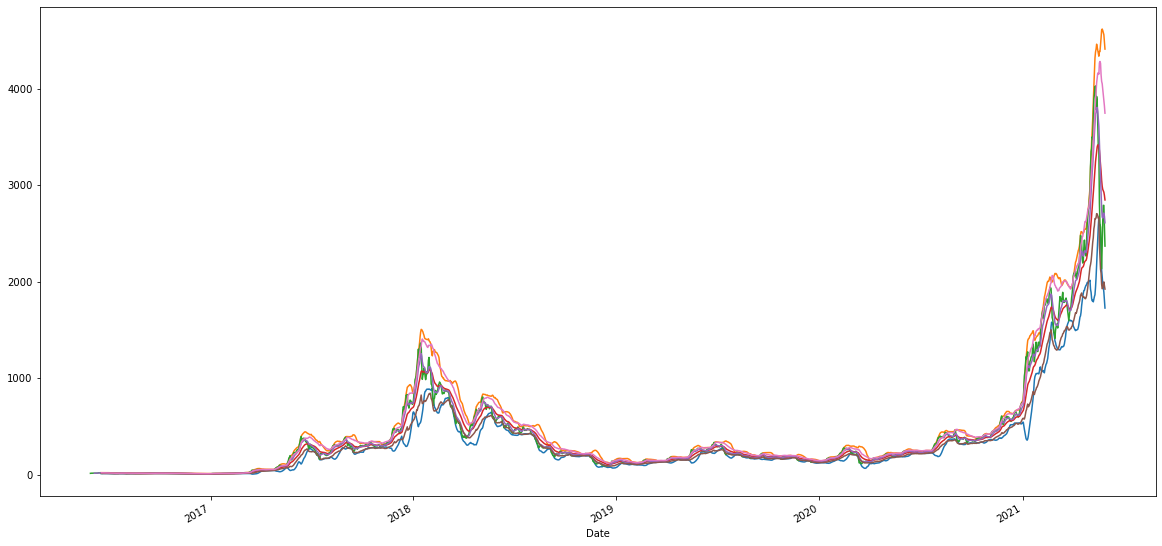

In [51]:
ema21_ohlc4_2 = ta.ema(ta.ohlc4(df_eth["Open"], df_eth["High"], df_eth["Low"], df_eth["Close"]), length=21)
ema08_ohlc4_2 = ta.ema(ta.ohlc4(df_eth["Open"], df_eth["High"], df_eth["Low"], df_eth["Close"]), length=8)
#df_closing_prices['DIS'].plot(figsize = (20,10))
candles2 = ta.ha(df_eth["Open"], df_eth["High"], df_eth["Low"], df_eth["Close"], offset=None)
bbands2 = ta.bbands(df_eth["Close"], length=20, std=None, mamode=None, offset=None)
squeeze2 = ta.squeeze(df_eth["High"], df_eth["Low"], df_eth["Close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=2, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
tr2 = ta.atr(df_eth["High"], df_eth["Low"], df_eth["Close"], length=14, mamode="ema", drift=1, offset=0)
kc2 = ta.kc(df_eth["High"], df_eth["Low"],  df_eth["Close"], length=21, scalar=2, mamode='ema', offset=0)

fig = plt.figure()
bbands2['BBL_20_2.0'].plot(figsize = (20,10))
bbands2['BBU_20_2.0'].plot(figsize = (20,10))
candles2['HA_close'].plot(figsize = (20,10))
ema21_ohlc4_2.plot(figsize = (20,10))
ema08_ohlc4_2.plot(figsize = (20,10))
kc2['KCLe_21_2.0'].plot(figsize = (20,10))
kc2['KCUe_21_2.0'].plot(figsize = (20,10))

<AxesSubplot:xlabel='Date'>

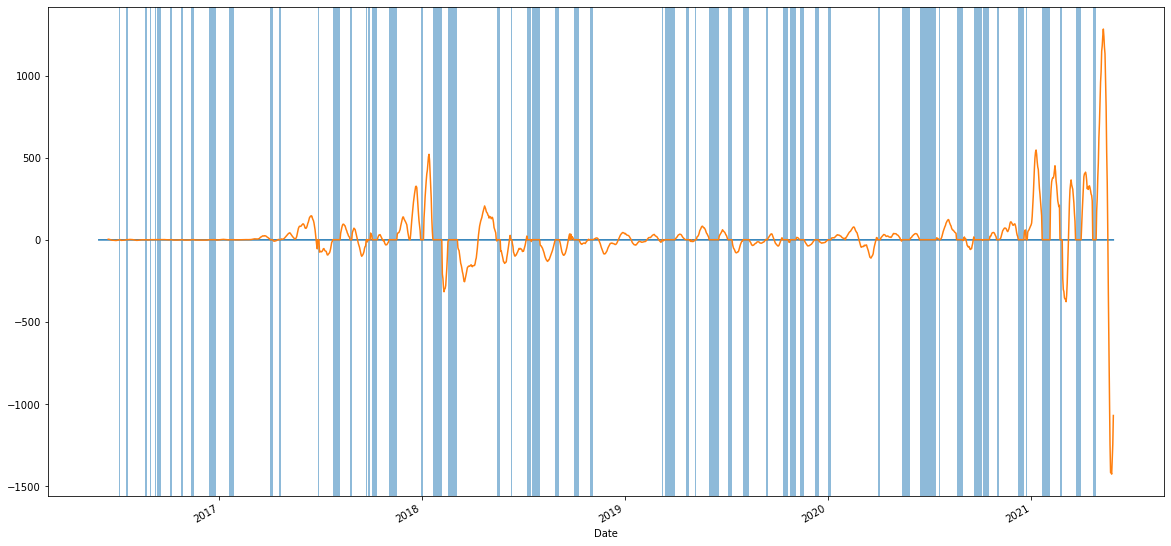

In [52]:
squeeze2[squeeze2['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
ax.fill_between(df_eth.index, 0, 1, where=squeeze2['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
squeeze_on_dis = plt.plot(df_eth.index, squeeze2['SQZ_ON'])
squeeze_on_dis

squeeze2['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))

<AxesSubplot:xlabel='time'>

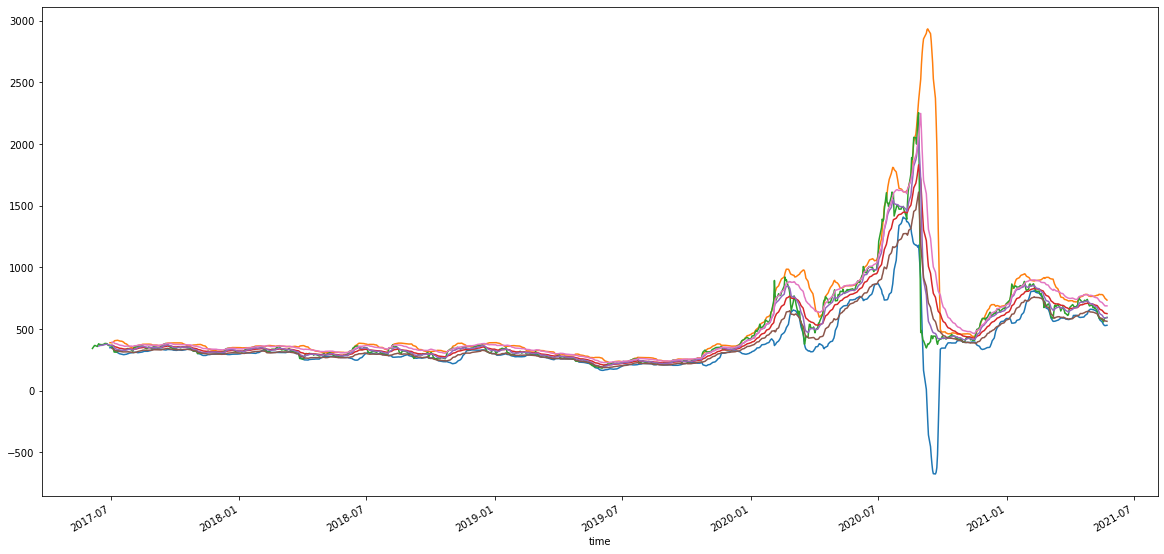

In [53]:
ema21_ohlc4 = ta.ema(ta.ohlc4(tsla_df['TSLA']["open"], tsla_df['TSLA']["high"], tsla_df['TSLA']["low"], tsla_df['TSLA']["close"]), length=21)
ema08_ohlc4 = ta.ema(ta.ohlc4(tsla_df['TSLA']["open"], tsla_df['TSLA']["high"], tsla_df['TSLA']["low"], tsla_df['TSLA']["close"]), length=8)
#df_closing_prices['DIS'].plot(figsize = (20,10))
candles = ta.ha(tsla_df['TSLA']["open"], tsla_df['TSLA']["high"], tsla_df['TSLA']["low"], tsla_df['TSLA']["close"], offset=None)
bbands = ta.bbands(tsla_df['TSLA']["close"], length=20, std=None, mamode=None, offset=None)
squeeze = ta.squeeze(tsla_df['TSLA']["high"], tsla_df['TSLA']["low"], tsla_df['TSLA']["close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=1.5, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
tr = ta.atr(tsla_df['TSLA']["high"], tsla_df['TSLA']["low"], tsla_df['TSLA']["close"], length=14, mamode="ema", drift=1, offset=0)
kc = ta.kc(tsla_df['TSLA']["high"], tsla_df['TSLA']["low"],  tsla_df['TSLA']["close"], length=21, scalar=2, mamode='ema', offset=0)

fig = plt.figure()
bbands['BBL_20_2.0'].plot(figsize = (20,10))
bbands['BBU_20_2.0'].plot(figsize = (20,10))
candles['HA_close'].plot(figsize = (20,10))
ema21_ohlc4.plot(figsize = (20,10))
ema08_ohlc4.plot(figsize = (20,10))
kc['KCLe_21_2.0'].plot(figsize = (20,10))
kc['KCUe_21_2.0'].plot(figsize = (20,10))


<AxesSubplot:xlabel='Date'>

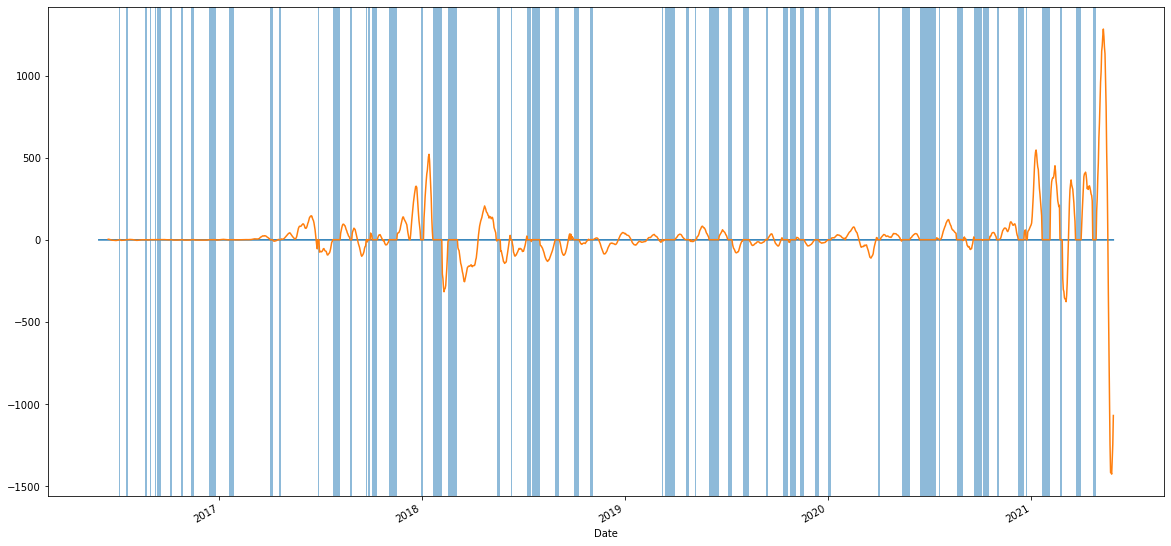

In [54]:
squeeze2[squeeze2['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
ax.fill_between(df_eth.index, 0, 1, where=squeeze2['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
squeeze_on_dis = plt.plot(df_eth.index, squeeze2['SQZ_ON'])
squeeze_on_dis

squeeze2['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))

<AxesSubplot:xlabel='time'>

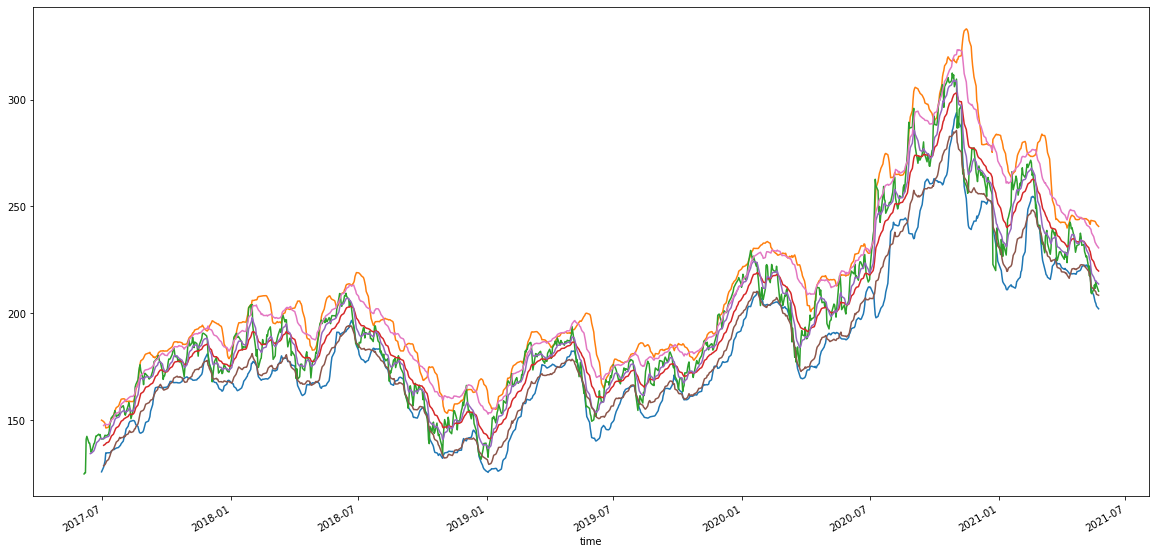

In [55]:
ema21_ohlc4 = ta.ema(ta.ohlc4(baba_df['BABA']["open"], baba_df['BABA']["high"], baba_df['BABA']["low"], baba_df['BABA']["close"]), length=21)
ema08_ohlc4 = ta.ema(ta.ohlc4(baba_df['BABA']["open"], baba_df['BABA']["high"], baba_df['BABA']["low"], baba_df['BABA']["close"]), length=8)
#df_closing_prices['DIS'].plot(figsize = (20,10))
candles = ta.ha(baba_df['BABA']["open"], baba_df['BABA']["high"], baba_df['BABA']["low"], baba_df['BABA']["close"], offset=None)
bbands = ta.bbands(baba_df['BABA']["close"], length=20, std=None, mamode=None, offset=None)
squeeze = ta.squeeze(baba_df['BABA']["high"], baba_df['BABA']["low"], baba_df['BABA']["close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=2, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
tr = ta.atr(baba_df['BABA']["high"], baba_df['BABA']["low"], baba_df['BABA']["close"], length=14, mamode="ema", drift=1, offset=0)
kc = ta.kc(baba_df['BABA']["high"], baba_df['BABA']["low"],  baba_df['BABA']["close"], length=21, scalar=2, mamode='ema', offset=0)

fig = plt.figure()
bbands['BBL_20_2.0'].plot(figsize = (20,10))
bbands['BBU_20_2.0'].plot(figsize = (20,10))
candles['HA_close'].plot(figsize = (20,10))
ema21_ohlc4.plot(figsize = (20,10))
ema08_ohlc4.plot(figsize = (20,10))
kc['KCLe_21_2.0'].plot(figsize = (20,10))
kc['KCUe_21_2.0'].plot(figsize = (20,10))

<AxesSubplot:xlabel='time'>

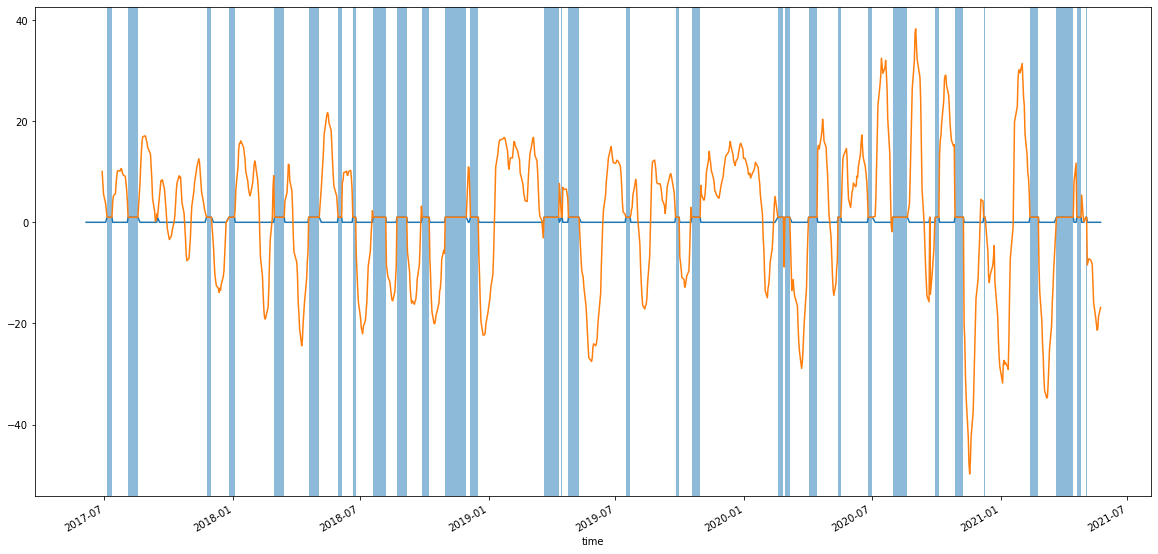

In [56]:
#Squeeze
squeeze[squeeze['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
ax.fill_between(baba_df['BABA'].index, 0, 1, where=squeeze['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
squeeze_on_dis = plt.plot(baba_df['BABA'].index, squeeze['SQZ_ON'])
squeeze_on_dis

squeeze['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))

<AxesSubplot:xlabel='time'>

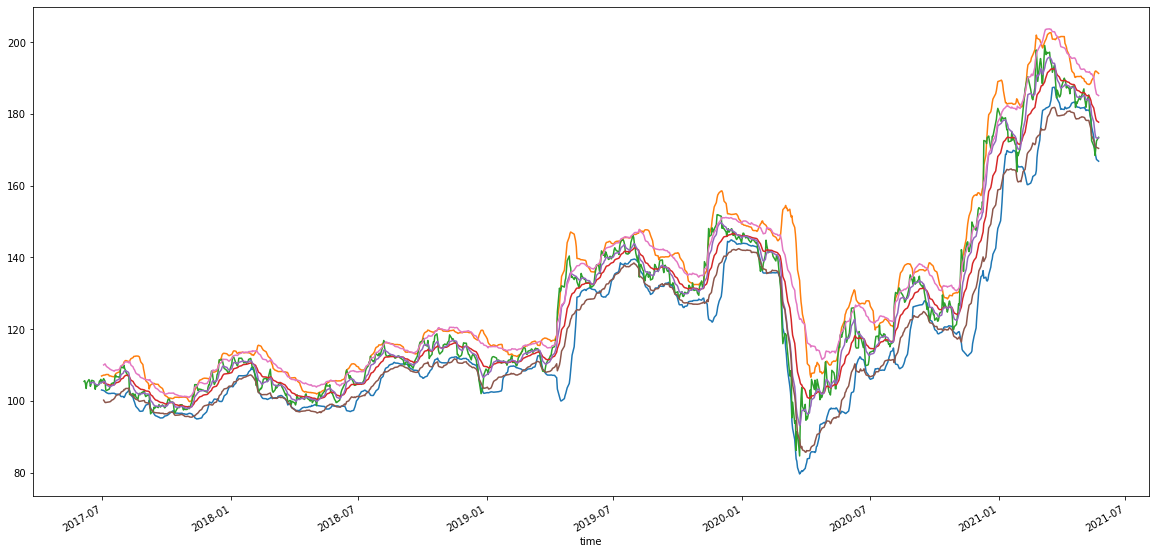

In [61]:
ema21_ohlc4 = ta.ema(ta.ohlc4(dis_df['DIS']["open"], dis_df['DIS']["high"], dis_df['DIS']["low"], dis_df['DIS']["close"]), length=21)
ema08_ohlc4 = ta.ema(ta.ohlc4(dis_df['DIS']["open"], dis_df['DIS']["high"], dis_df['DIS']["low"], dis_df['DIS']["close"]), length=8)
#df_closing_prices['DIS'].plot(figsize = (20,10))
candles = ta.ha(dis_df['DIS']["open"], dis_df['DIS']["high"], dis_df['DIS']["low"], dis_df['DIS']["close"], offset=None)
bbands = ta.bbands(dis_df['DIS']["close"], length=20, std=None, mamode=None, offset=None)
squeeze = ta.squeeze(dis_df['DIS']["high"], dis_df['DIS']["low"], dis_df['DIS']["close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=2, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
tr = ta.atr(dis_df['DIS']["high"], dis_df['DIS']["low"], dis_df['DIS']["close"], length=14, mamode="ema", drift=1, offset=0)
kc = ta.kc(dis_df['DIS']["high"], dis_df['DIS']["low"],  dis_df['DIS']["close"], length=21, scalar=2, mamode='ema', offset=0)

fig = plt.figure()
bbands['BBL_20_2.0'].plot(figsize = (20,10))
bbands['BBU_20_2.0'].plot(figsize = (20,10))
candles['HA_close'].plot(figsize = (20,10))
ema21_ohlc4.plot(figsize = (20,10))
ema08_ohlc4.plot(figsize = (20,10))
kc['KCLe_21_2.0'].plot(figsize = (20,10))
kc['KCUe_21_2.0'].plot(figsize = (20,10))

<AxesSubplot:xlabel='time'>

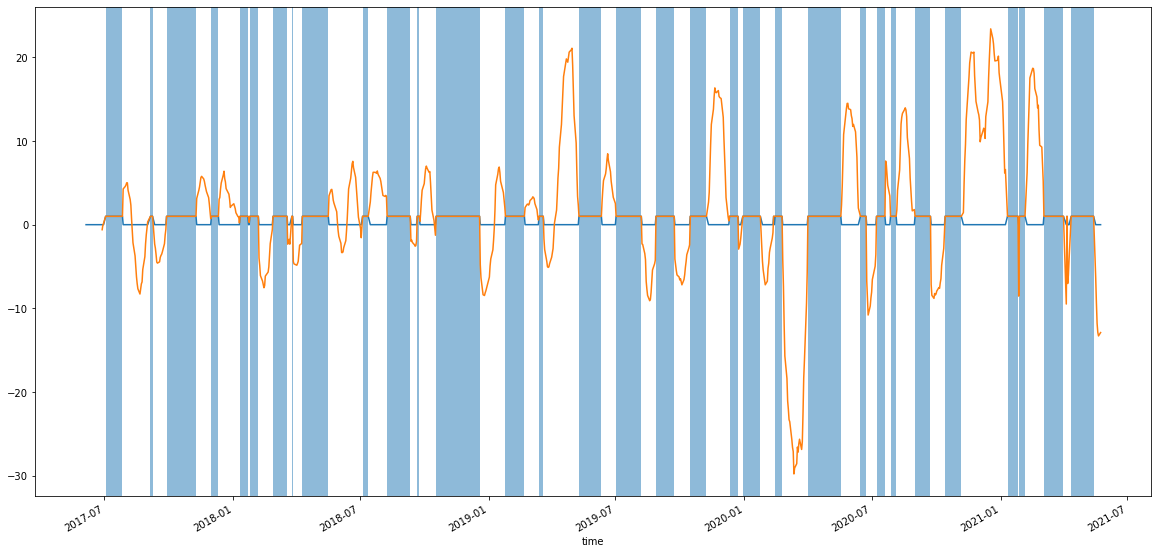

In [62]:
#Squeeze

squeeze[squeeze['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
ax.fill_between(dis_df['DIS'].index, 0, 1, where=squeeze['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
squeeze_on_dis = plt.plot(dis_df['DIS'].index, squeeze['SQZ_ON'])
squeeze_on_dis

squeeze['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))

<AxesSubplot:xlabel='time'>

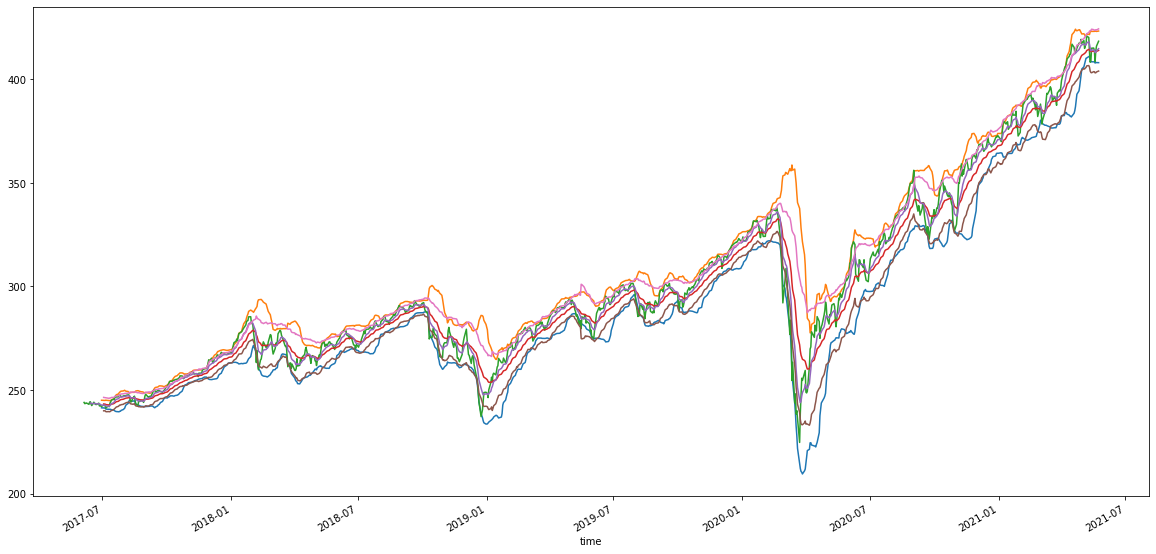

In [59]:
ema21_ohlc4 = ta.ema(ta.ohlc4(spy_df['SPY']["open"], spy_df['SPY']["high"], spy_df['SPY']["low"], spy_df['SPY']["close"]), length=21)
ema08_ohlc4 = ta.ema(ta.ohlc4(spy_df['SPY']["open"], spy_df['SPY']["high"], spy_df['SPY']["low"], spy_df['SPY']["close"]), length=8)
#df_closing_prices['DIS'].plot(figsize = (20,10))
candles = ta.ha(spy_df['SPY']["open"], spy_df['SPY']["high"], spy_df['SPY']["low"], spy_df['SPY']["close"], offset=None)
bbands = ta.bbands(spy_df['SPY']["close"], length=20, std=None, mamode=None, offset=None)
squeeze = ta.squeeze(spy_df['SPY']["high"], spy_df['SPY']["low"], spy_df['SPY']["close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=2, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
tr = ta.atr(spy_df['SPY']["high"], spy_df['SPY']["low"], spy_df['SPY']["close"], length=14, mamode="ema", drift=1, offset=0)
kc = ta.kc(spy_df['SPY']["high"], spy_df['SPY']["low"],  spy_df['SPY']["close"], length=21, scalar=2, mamode='ema', offset=0)

fig = plt.figure()
bbands['BBL_20_2.0'].plot(figsize = (20,10))
bbands['BBU_20_2.0'].plot(figsize = (20,10))
candles['HA_close'].plot(figsize = (20,10))
ema21_ohlc4.plot(figsize = (20,10))
ema08_ohlc4.plot(figsize = (20,10))
kc['KCLe_21_2.0'].plot(figsize = (20,10))
kc['KCUe_21_2.0'].plot(figsize = (20,10))

<AxesSubplot:xlabel='Date'>

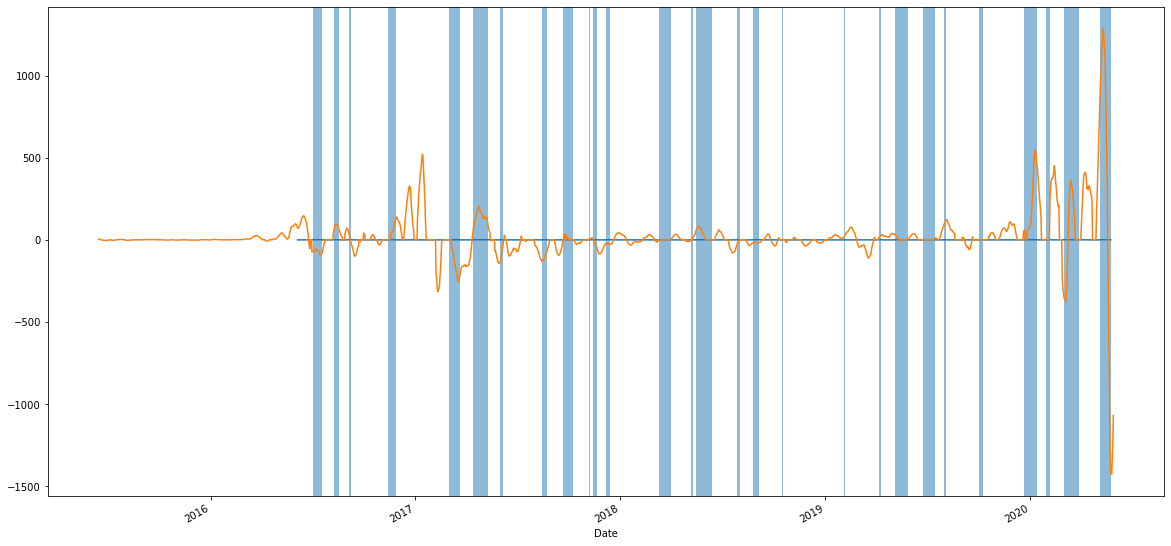

In [60]:
#Squeeze

squeeze[squeeze['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
ax.fill_between(spy_df['SPY'].index, 0, 1, where=squeeze['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
squeeze_on_dis = plt.plot(spy_df['SPY'].index, squeeze['SQZ_ON'])
squeeze_on_dis

squeeze2['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))